/tmp/ipykernel_3688980/2538228665.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="HIndex", showfliers=False, palette=palette_Emma)


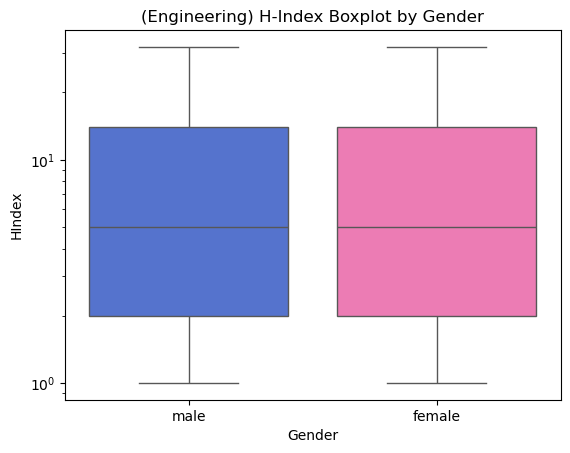

Summary Statistics of H-index by Gender (Engineering)
            count       mean        std  min  25%  50%   75%     max
Gender                                                              
female   432355.0  13.556302  27.877749  1.0  2.0  5.0  14.0  2069.0
male    3159135.0  14.054822  32.591996  1.0  2.0  5.0  14.0  8209.0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Engineering_H_index_with_gender.csv")

df_filtered = df[df["HIndex"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="HIndex", showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) H-Index Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["HIndex"].describe())

print("Summary Statistics of H-index by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["HIndex"]
    .describe()
)

In [2]:
from scipy.stats import mannwhitneyu

male = df[df["Gender"] == "male"]["HIndex"]
female = df[df["Gender"] == "female"]["HIndex"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p}")

Mann-Whitney U test: U=697730435542.5, p=1.2230590086196199e-119


In [3]:
top_10_percent = df[df["HIndex"] > df["HIndex"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)

            AuthorId  HIndex   Gender  Genderized
0         1995014452      16     male         0.0
1         2002579779      18     male         0.0
2         2250382311      33     male         0.0
5           97662032     365     male         0.0
6          131295039     147     male         0.0
...              ...     ...      ...         ...
17035676  3108206617      24  unknown         NaN
17035677  3110475383      24  unknown         NaN
17035685  3107260487      21  unknown         NaN
17035686  3108729064      21  unknown         NaN
17035723  2997064162      24  unknown         NaN

[1654493 rows x 4 columns]
Gender
unknown    0.469577
male       0.465676
female     0.064747
Name: proportion, dtype: float64


In [4]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)

Gender
unknown    0.789180
male       0.185440
female     0.025379
Name: proportion, dtype: float64


In [5]:
import numpy as np


def gini(array):
    array = array[np.isfinite(array)]
    array = np.sort(array)
    n = len(array)
    if n == 0 or np.sum(array) == 0:
        return np.nan
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index


import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["HIndex"].values)
    print(f"Gini coefficient for {gender} (In-HIndex): {gini_score:.4f}")
    
overall_gini = gini(df["HIndex"].values)
print(f"Overall Gini coefficient (HIndex): {overall_gini:.4f}")

Gini coefficient for male (In-HIndex): 0.6721
Gini coefficient for unknown (In-HIndex): 0.8847
Gini coefficient for female (In-HIndex): 0.6690
Overall Gini coefficient (HIndex): 0.8429
